### Preprocess data

In [52]:
import pandas as pd
import numpy as np

In [53]:
# Import data
df = pd.read_csv('original_amazon.csv')
df.head(2)

,index,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...


In [54]:
# Only keep select columns
columns_to_keep = ['Category', 'Product Title', 'Product Description', 'Brand', 'Price']
df = df[columns_to_keep]

# Drop rows with null values
df = df.dropna()

# Display the first few rows of the modified DataFrame
df.head(2)

,Category,Product Title,Product Description,Brand,Price
0,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,799.00
1,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,2040.00


In [55]:
# Create a new column for conditions and randomly assign a value
conditions = ['New', 'Very good', 'Good', 'Bad', 'Very bad']
df['Conditions'] = np.random.choice(conditions, size=len(df))

df.head(2)

,Category,Product Title,Product Description,Brand,Price,Conditions
0,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,799.00,Very bad
1,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,2040.00,Very bad


In [56]:
# Merge Category with Brand column
df['Category'] = df['Category'] + ' | ' + df['Brand']
df.drop(columns=['Brand'], inplace=True)

df.head()

,Category,Product Title,Product Description,Price,Conditions
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.00,Very bad
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.00,Very bad
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.00,Bad
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.00,Very bad
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,570.00,Very bad


In [57]:
# Save the new dataset  
## df.to_csv('new_amazon.csv', index=False)

In [58]:
df['Category'].values

array(['Skin Care | Lee Posh', 'Skin Care | SLB Works',
       'Skin Care | Generic', ..., 'Skin Care | Pure Organics',
       'Skin Care | YASHUS', 'Skin Care | Slss'], dtype=object)

In [59]:
pip install faker


Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
from faker import Faker
import re
import random
# Faker instance for generating country names
faker = Faker()

# Regular expression to match country names
country_regex = re.compile(r'\b(India|Indian|Korean|etc)\b', flags=re.IGNORECASE)

# Function to replace country names with random country names
def replace_country(match):
    countries = ['Country1', 'Country2', 'Country3']  # List of random country names
    return random.choice(countries)

# Replace country names in the DataFrame
df['Product Title'] = df['Product Title'].apply(lambda x: country_regex.sub(replace_country, x))
df['Product Description'] = df['Product Description'].apply(lambda x: country_regex.sub(replace_country, x))

print(df)


                                Category  \
0                   Skin Care | Lee Posh   
1                  Skin Care | SLB Works   
2                    Skin Care | Generic   
3                    Skin Care | Generic   
4      Grocery & Gourmet Foods | Harveys   
...                                  ...   
29992                 Skin Care | Laikou   
29993         Bath & Shower | Dermasolve   
29995          Skin Care | Pure Organics   
29996                 Skin Care | YASHUS   
29999                   Skin Care | Slss   

                                           Product Title  \
0       Lee posh Lactic Acid 60% Anti ageing Pigmenta...   
1       Branded SLB Works New 1.5mm Titanium 1200 nee...   
2       Generic 1 Pc brand snail eye cream remove dar...   
3       Generic Anti Snoring Snore Stopper Sleep Apne...   
4       Harveys Crunchy & Creame Gourmet Delicacies C...   
...                                                  ...   
29992   New Day Creams & Moisturizers Pure Nature S

In [61]:
df.to_csv('countries_amazon.csv', index=False)

                                     Product Description  Description Length
0      PROFESSIONAL GRADE Face Peel: this peel stimul...                 325
1      Item name: 1.5mm titanium 1200 needles microne...                 982
2      Use: eye, item type: cream, net wt: 20g, gzzz:...                 510
3      Prevent the tongue from dropping backward or b...                 438
4      Harvey's wafer Cream Wafer 110g. Made in Country1                  49
...                                                  ...                 ...
29992  Use: Face, Item Type: Cream, Ingredient: Aloe ...                1024
29993  Use before showering to help soften the scales...                 586
29995  For a smooth & Flawless complexion this scrub ...                 379
29996  Gold eye mask is suitable for people: Eye patt...                 417
29999  With 2.5% active Retinol, Hyaluronic Acid, Vit...                 508

[27468 rows x 2 columns]
count    27468.000000
mean       394.508992
std   

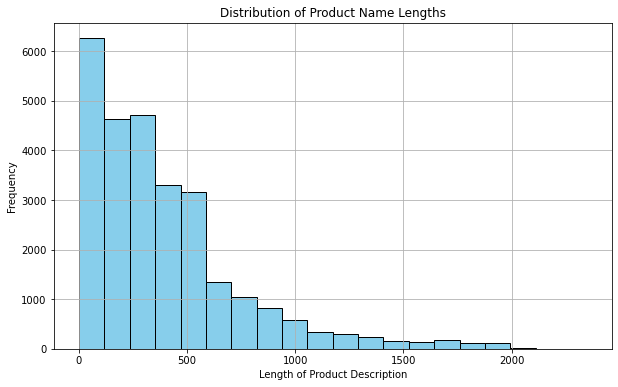

In [62]:
df['Description Length'] = df['Product Description'].apply(len)
print(df[['Product Description', 'Description Length']])

description = df['Description Length'].describe()
print(description)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Description Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Name Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

                                     Product Description  Description Length
0      PROFESSIONAL GRADE Face Peel: this peel stimul...               325.0
1      Item name: 1.5mm titanium 1200 needles microne...               692.0
2      Use: eye, item type: cream, net wt: 20g, gzzz:...               510.0
3      Prevent the tongue from dropping backward or b...               438.0
4      Harvey's wafer Cream Wafer 110g. Made in Country1                49.0
...                                                  ...                 ...
29992  Use: Face, Item Type: Cream, Ingredient: Aloe ...               692.0
29993  Use before showering to help soften the scales...               586.0
29995  For a smooth & Flawless complexion this scrub ...               379.0
29996  Gold eye mask is suitable for people: Eye patt...               417.0
29999  With 2.5% active Retinol, Hyaluronic Acid, Vit...               508.0

[27468 rows x 2 columns]


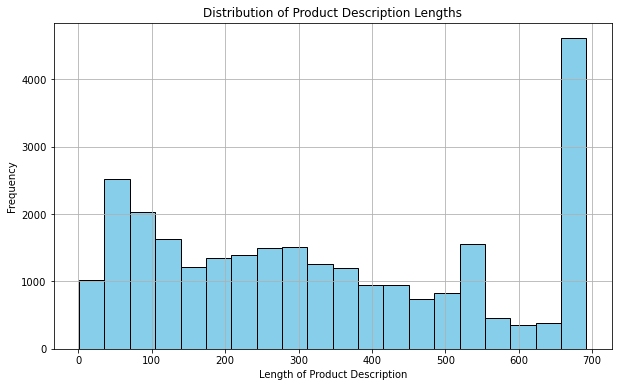

In [63]:
# Calculate the 75th percentile of description lengths
percentile_75 = df['Description Length'].quantile(0.85)

# Update description lengths exceeding the 75th percentile
df['Description Length'] = df['Description Length'].apply(lambda x: min(x, percentile_75))

# Print updated DataFrame
print(df[['Product Description', 'Description Length']])

# Plot the updated distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Description Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Description Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [64]:
df.head()

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.00,Very bad,325.0
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.00,Very bad,692.0
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.00,Bad,510.0
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.00,Very bad,438.0
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country1,570.00,Very bad,49.0


In [71]:
# Convert 'Price' column to numeric (if it's not already numeric)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Assuming an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.014

# Convert price from INR to USD
df['Price in USD'] = df['Price'] * exchange_rate
# Round 'Price in USD' column to two decimal places
df['Price in USD'] = df['Price in USD'].round(2)

# Print the updated DataFrame
df.head(10)


,Category,Product Title,Product Description,Price,Conditions,Description Length,Price in USD
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,799.0,Very bad,325.0,11.19
1,Skin Care | SLB Works,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,2040.0,Very bad,692.0,28.56
2,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",1042.0,Bad,510.0,14.59
3,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,1399.0,Very bad,438.0,19.59
4,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country1,570.0,Very bad,49.0,7.98
5,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",5344.0,Bad,187.0,74.82
6,Bath & Shower | Lather+%26+Fizz+Bath+Boutique,Black & Tan Beer Soap 4-Pack,Our handmade soaps are made with the highest g...,7269.0,Very bad,179.0,101.77
7,Bath & Shower | Mydio,Mydio 2 Pack Waterproof Women Shower Caps Bat...,Mydio 2 Pack Waterproof Women Shower Caps Bath...,1659.0,Very bad,96.0,23.23
8,Grocery & Gourmet Foods | FOODSTUDIO,Food Studio Premium Quality in Shell Pistachi...,Pistachios are small in appearance and are enc...,660.0,Very good,485.0,9.24
9,Grocery & Gourmet Foods | Dr Gluten,Dr Glutens Gluten Free Khracker (KHAKHRA) - 2...,GLUTEN FREE KHAKHRAS. LIGHT HEALTHY AND ROASTE...,279.0,New,222.0,3.91


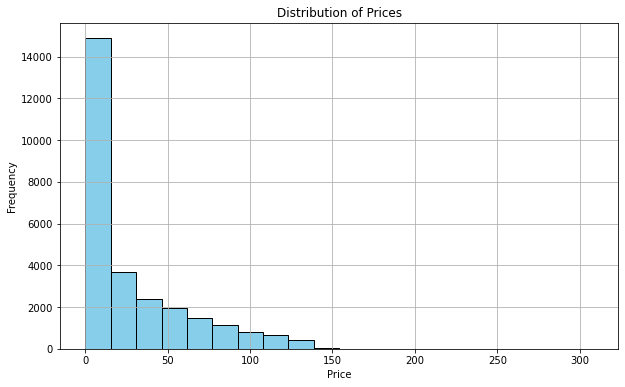

count    27408.000000
mean      2076.821812
std       2340.095812
min         12.000000
25%        398.000000
50%        985.000000
75%       3129.065000
90%       5800.000000
95%       7382.950000
99%       9280.000000
max      21990.000000
Name: Price, dtype: float64


In [73]:
import matplotlib.pyplot as plt

# Plot histogram of 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(df['Price in USD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate box plot percentiles
percentiles = df['Price'].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles)


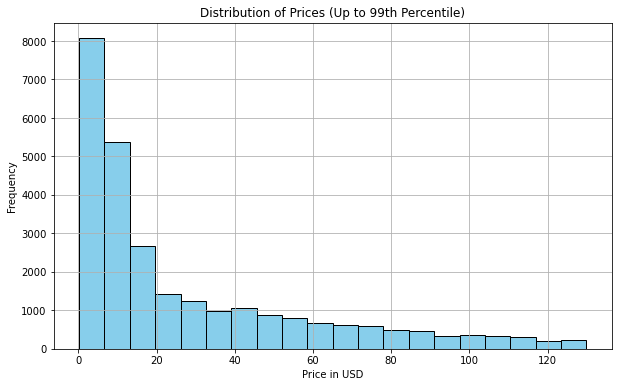

count    27144.000000
mean        28.030533
std         31.126345
min          0.170000
25%          5.530000
50%         13.430000
75%         42.560000
90%         78.397000
95%         98.560000
99%        122.425700
max        129.920000
Name: Price in USD, dtype: float64


In [74]:
import matplotlib.pyplot as plt

# Calculate the 99th percentile
percentile_99 = df['Price in USD'].quantile(0.99)

# Filter the DataFrame to include only prices up to the 99th percentile
df_filtered = df[df['Price in USD'] <= percentile_99]

# Plot histogram of filtered 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Price in USD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices (Up to 99th Percentile)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate box plot percentiles for the filtered data
percentiles_filtered = df_filtered['Price in USD'].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(percentiles_filtered)
